In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np

ModuleNotFoundError: No module named 'test_sorting'

Define Max function

In [272]:
def maxIndex(S, i, j):
    if S[i] >= S[j]:
        return i
    else:
        return j

Define reverse

Note that complexity of this function is O(N) because Python iterate through list

In [273]:
def reverse(S, i):
    S[:i+1] = S[:i+1][::-1]
    return S

Helper function to generate test sample based on given sorting algorithm

In [274]:
def generate_sample(sort):
    samples = [1, 10, 100, 1000, 10000]
    o = []
    for size in samples:
        _, operations = sort(generate_array(size))
        o.append((size, operations))
    return o

Helper function to check if given array is sorted or not

In [275]:
def is_sorted(lst):
    return all(lst[i] <= lst[i+1] for i in range(len(lst)-1))

Helper function to plot Order graph

In [276]:
def o_graph(n_o_pairs):
    x_funcs = np.arange(1, max(n_o_pairs)[0] + 1)
    y_linear = x_funcs
    y_quadratic = x_funcs**2
    y_logarithmic = np.log(x_funcs)
    y_linear_log = x_funcs * np.log(x_funcs)
    y_exponential = 2**x_funcs

    for i in range(1, len(y_exponential)):
        y_exponential[i] = max(y_exponential[i], y_exponential[i-1])

    plt.figure(figsize=(10, 6))

    plt.plot(x_funcs, y_linear, label='O(n)', linewidth=2 ,alpha=0.5)
    plt.plot(x_funcs, y_quadratic, label='O(n^2)', linewidth=2 ,alpha=0.5)
    plt.plot(x_funcs, y_logarithmic, label='O(log n)', linewidth=2 ,alpha=0.5)
    plt.plot(x_funcs, y_linear_log, label='O(n log n)', linewidth=2 ,alpha=0.5)
    plt.plot(x_funcs, y_exponential, label='O(2^n)', linewidth=2 ,alpha=0.5)

    n, o = zip(*n_o_pairs)
    plt.plot(n, o, marker='o', color='green',  linewidth=2, label='Result', zorder=5, markersize=5)

    plt.title('Algorithm Complexity Graph')
    plt.xlabel('Input Size (n)')
    plt.ylabel('Number of Operations')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(1, max(x_funcs))
    plt.ylim(1, max(o))
    plt.legend()

    plt.show()

Helper function to generate array given size

In [277]:
def generate_array(len, min = "empty", max = "empty", unique = False):
    max_value = len // 2
    if min == "empty" or not isinstance(min, int):
        min = -max_value
    
    if max == "empty" or not isinstance(max, int):
        max = max_value

    if max - min + 1 < len:
        raise ValueError("Range between min and max is too small for the requested array length.")
    
        
    if unique:
        array = random.sample(range(min, max + 1), len)
    else:
        array = [random.randint(min , max) for _ in range(len)]
        
    return array

helper function to visualize sort alg

In [278]:
plt.ion()

def visualize_sort(steps):
    print(steps[-1])
    plt.figure(figsize=(5, 4))
    global_min = min(min(s) for s in steps)
    global_max = max(max(s) for s in steps)

    for i, step in enumerate(steps):
        plt.cla()

        plt.ylim(global_min - 1, global_max + 1)
        plt.xticks([])
        plt.yticks([])
        plt.bar(range(len(step)), [0.05 if val == 0 else val for val in step], color='skyblue')
        plt.xlabel(f"Step {i}")
        plt.pause(0.5)

    plt.show()

Reverse Sort iterate through all elements of the list O(N)
    Inside alg iterate through (list - sorted index) basically reduce number by one each parent iteration and find maximum element 
           alg iterate check if the max element is already on the right spot if not perform reverse to local max and reverse sorted_index O((N-1) + N + N)
           
            according to assignment take Complexity of reverse as 1
        
Result is O(N^2)

In [279]:
def reverse_sort(S):

    state = []
    operations = 0

    if not S:
        state.append(S)
        return S, operations

    else:
        sorted_index = len(S)
        for i in range(len(S)):
            operations += 1
            local_max = 0
            sorted_index = sorted_index - 1
            for j in range(sorted_index):
                operations += 1
                if maxIndex(S, local_max ,j+1) == j+1:
                    local_max = j+1

            if local_max != sorted_index:
                reverse(S, local_max)
                state.append(S.copy())
                operations += 1

                reverse(S, sorted_index)
                operations += 1

            state.append(S.copy())

    return state, operations


In [280]:
test = generate_array(10, min=0, max=10, unique=True)

(s, o) = reverse_sort(test)

Operations: 67
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10]


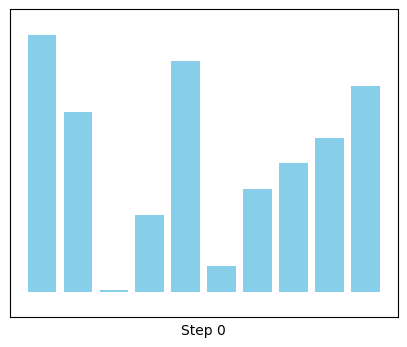

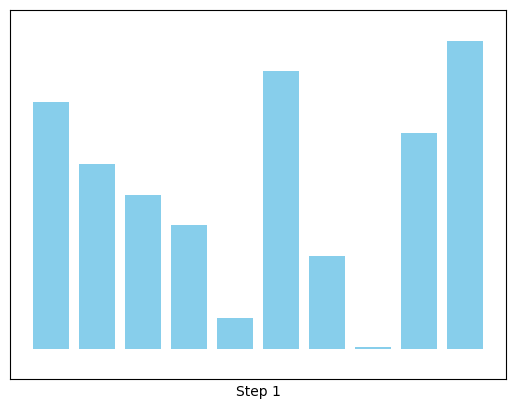

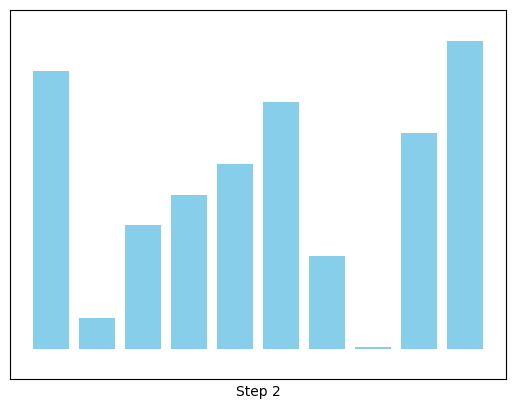

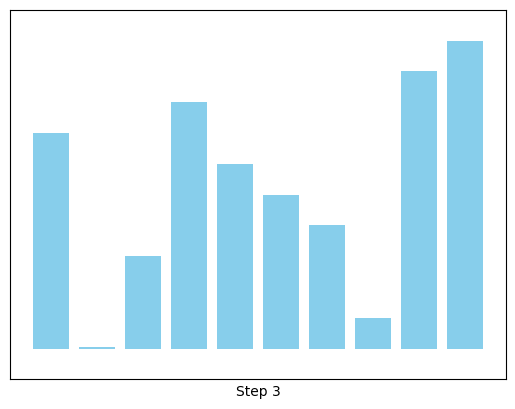

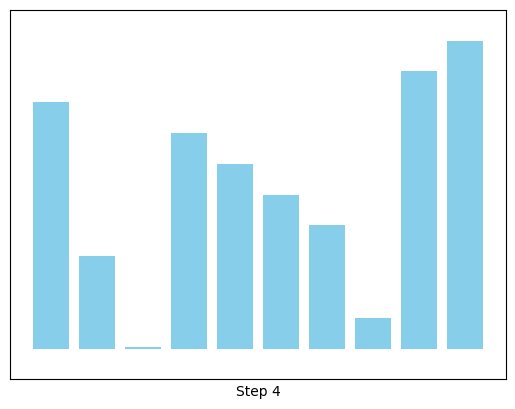

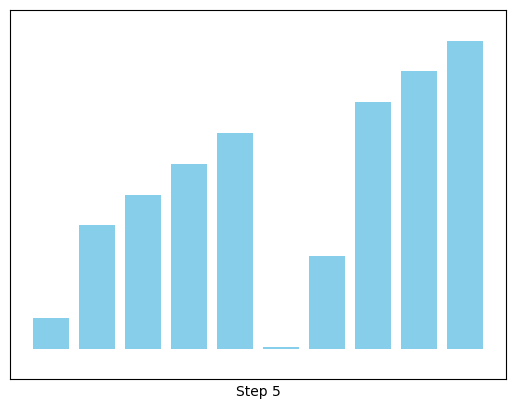

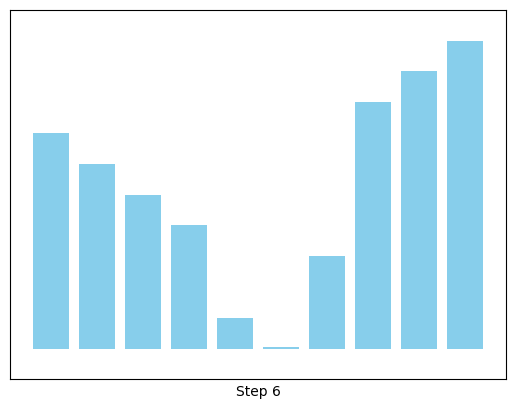

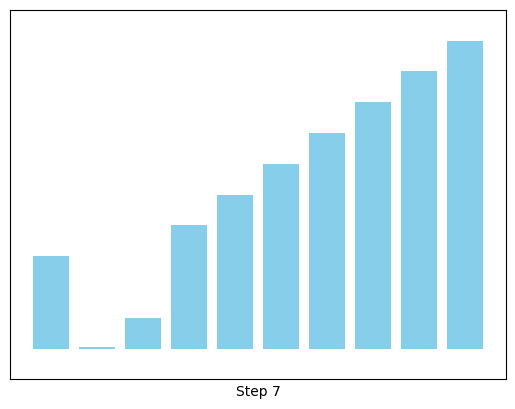

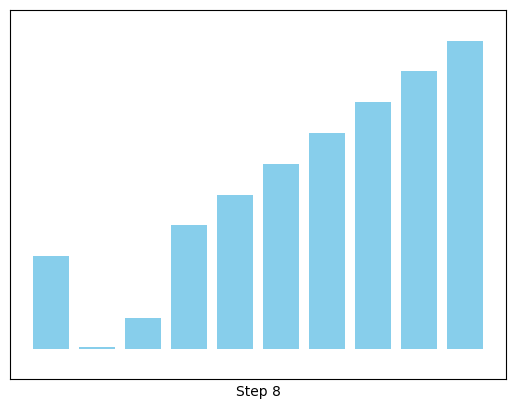

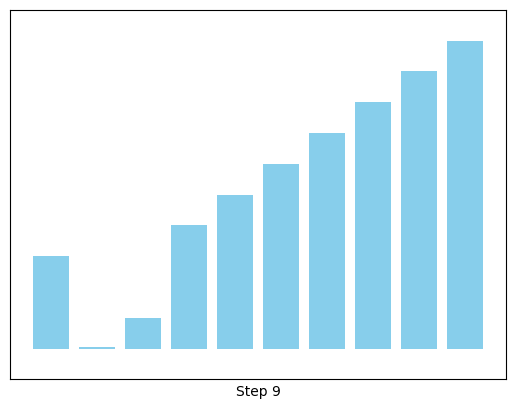

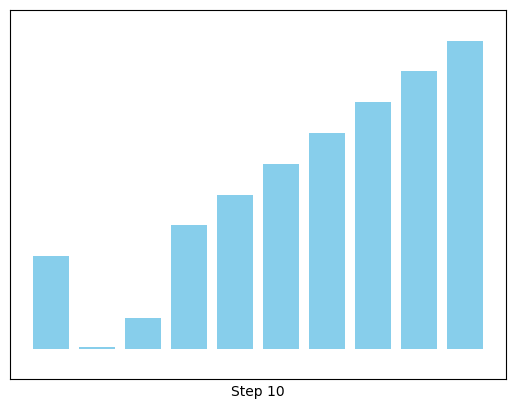

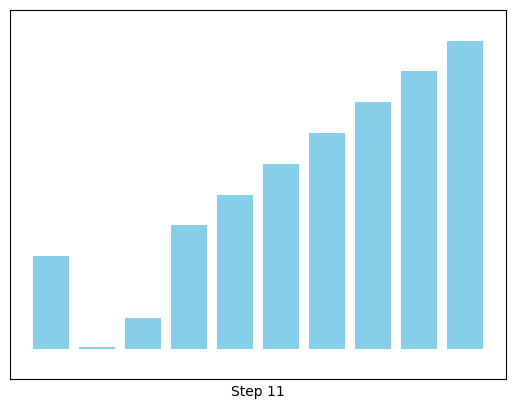

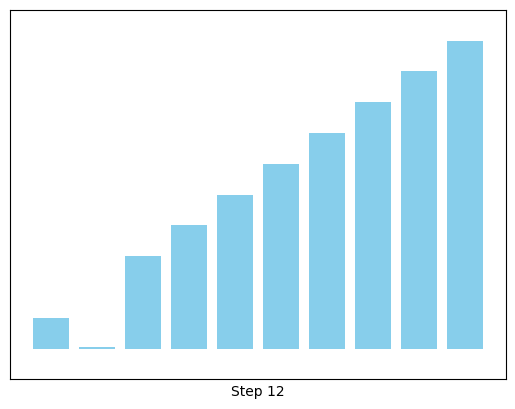

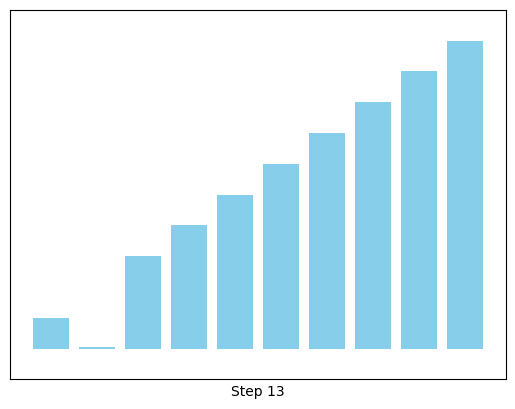

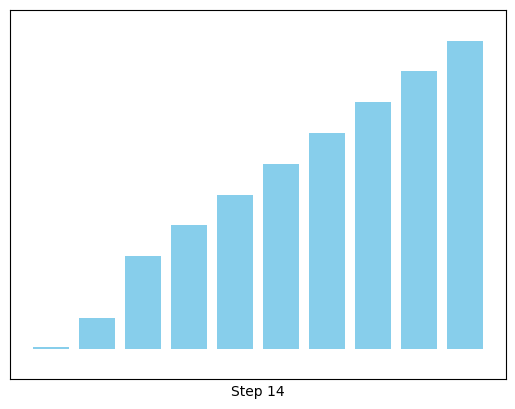

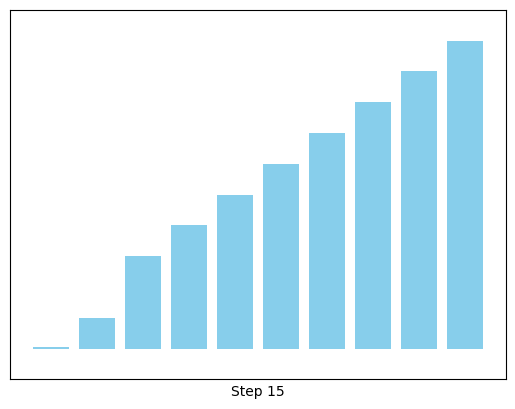

In [284]:
print(f"Operations: {o}")

visualize_sort(s)

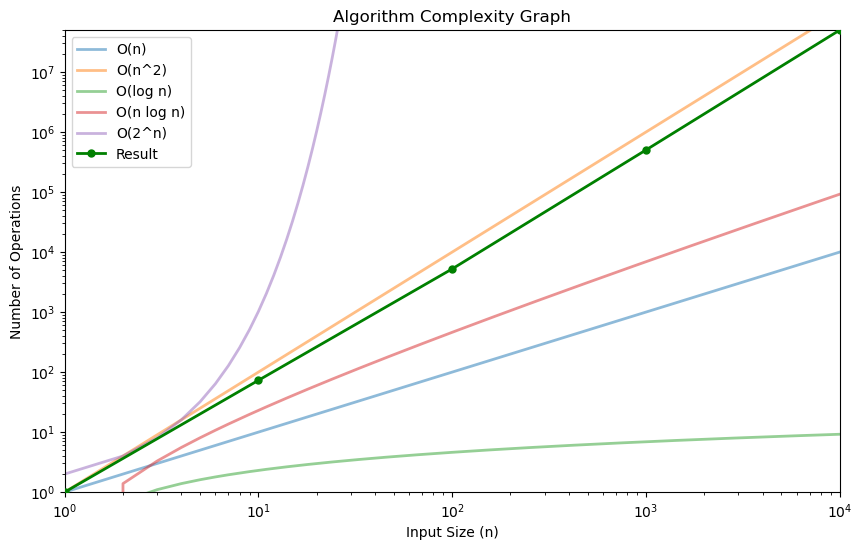

In [282]:
sample = generate_sample(reverse_sort)

o_graph(sample)

Indeed complexity is near O(N^2)

_________________________________________
Unit tests

In [283]:
def test_sorting(num_arrays, sort_function, max_array_length = 20, min_value = -20, max_value = 20):
    success = True
    for _ in range(num_arrays):
        length = random.randint(1, max_array_length)
        min_val = random.randint(min_value, 0)
        max_val = random.randint(0, max_value)
        unique = random.choice([True, False])

        try:
            arr = generate_array(length, min_val, max_val, unique)
        except ValueError as e:
            print(f"Skipping an array due to invalid parameters: {e}")
            continue

        sorted_arr, _ = sort_function(arr)
        if not is_sorted(arr):
            success = False
            print(f"Array {arr} was not sorted correctly to {sorted_arr}.")
            break

    if success:
        print("All arrays sorted successfully!")
    else:
        print("Some arrays were not sorted correctly.")


test_sorting(num_arrays = 10, sort_function = reverse_sort)


Skipping an array due to invalid parameters: Range between min and max is too small for the requested array length.
Skipping an array due to invalid parameters: Range between min and max is too small for the requested array length.
All arrays sorted successfully!
